# TennensorFlow Image Classification
Task:
* Imports
* Data Preperation
* Create Model
* Evaluate Model
* Predict

In [1]:
# imports that will be used anywhere as required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data preprocessing

In [2]:
# import fashion_mnist from tensorflow datasets
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets and is in touple datatype
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# let's see the training data and labels for first column data
print(f"Training sample:\n{X_train[0]}\n")
print(f"Training labels:\n{y_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of data it will be important later on
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [5]:
# total number of data and labels
print(f"total no. of data: {len(X_train)}")
print(f"unique labels: {set(y_train)}")
print(f"total no. of unique labels: {len(set(y_train))}")

total no. of data: 60000
unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
total no. of unique labels: 10


From the link https://github.com/zalandoresearch/fashion-mnist we can see that the labels represents

<table>
<thead>
<tr>
<th>Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td>1</td>
<td>Trouser</td>
</tr>
<tr>
<td>2</td>
<td>Pullover</td>
</tr>
<tr>
<td>3</td>
<td>Dress</td>
</tr>
<tr>
<td>4</td>
<td>Coat</td>
</tr>
<tr>
<td>5</td>
<td>Sandal</td>
</tr>
<tr>
<td>6</td>
<td>Shirt</td>
</tr>
<tr>
<td>7</td>
<td>Sneaker</td>
</tr>
<tr>
<td>8</td>
<td>Bag</td>
</tr>
<tr>
<td>9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

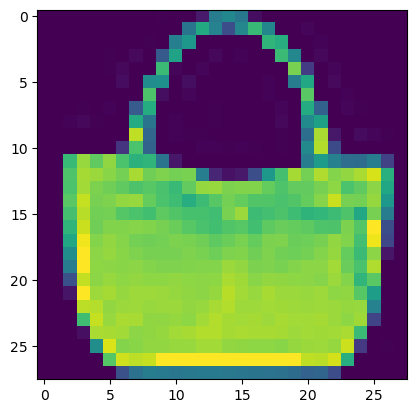

In [6]:
# plot single sample
plt.imshow(X_train[100]) #! imshow for images

In [7]:
# check out sample labels
y_train[100]

8

In [8]:
# store label names in list 
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]
len(label_names)

10

In [9]:
# plot an example image and its labels 

# first let's create a reusable function
def plot_single(X, y, index):
    plt.imshow(X[index], cmap=plt.cm.binary)
    plt.title(label_names[y[index]])

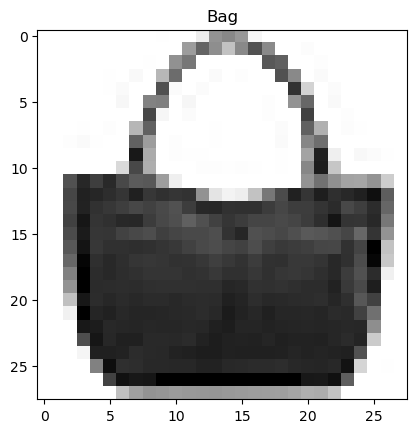

In [10]:
# now let's plot single image from data
plot_single(X_train, y_train, 100)

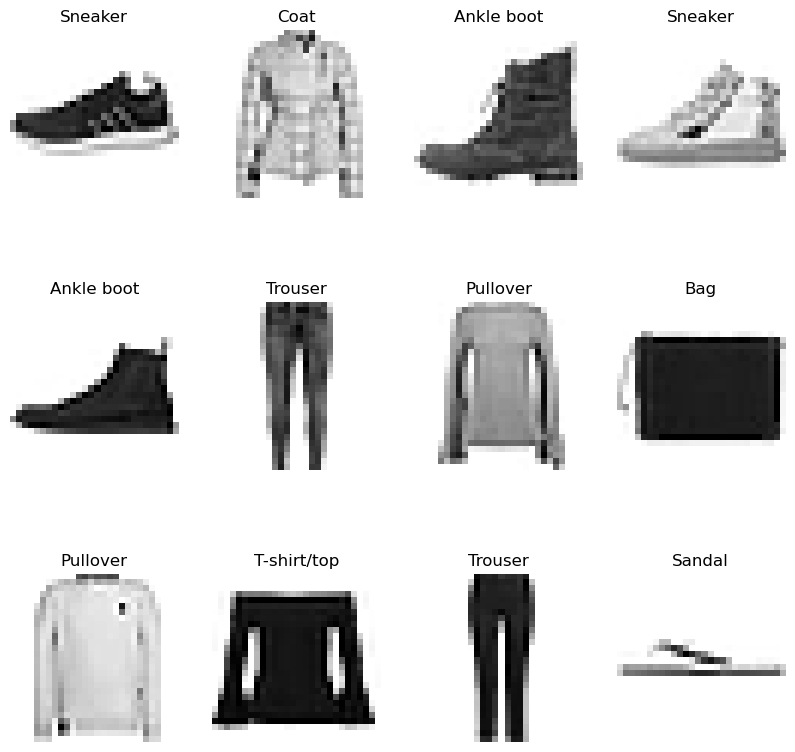

In [11]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.title(label_names[y_train[rand_index]])
    plt.axis(False)

### Feature Scaling - normalization

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

#### Normal way

In [13]:
# even though it's not reusable lets use function to shape the data

def normalize_data(data):
    return data / data[0].max()

In [14]:
# normalize our data

X_train_norm = normalize_data(X_train)
X_test_norm = normalize_data(X_test)

print(f"Training sample:\n{X_train_norm[0]}\n")

Training sample:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

#### using sklearn

In [15]:
from sklearn.preprocessing import MinMaxScaler

# to transform data using MinMaxScalar we need to reshape our data
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

scalar = MinMaxScaler()

# fitting Scalar
scalar.fit(X_train_reshaped)


# transform our data
X_train_norm_mns = scalar.transform(X_train_reshaped)
X_test_norm_mns = scalar.transform(X_test_reshaped)

# let's check on our train data
print(f"Training sample:\n{X_train_norm_mns[0]}\n")

Training sample:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.050

### Create Model

In [16]:
# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # X_train_norm shape
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 10:total labels, softmax: multi-class classification
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics=["accuracy"])

# fit the model
history = model.fit(X_train_norm,
                    y_train, epochs=20,
                    validation_data=(X_test_norm, y_test))

Epoch 1/20


/Users/achbj/opt/miniconda3/envs/nn/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-07-07 20:26:24.120107: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 12s 6ms/step - loss: 1.4802 - accuracy: 0.4809 - val_loss: 0.9468 - val_accuracy: 0.6709
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8166 - accuracy: 0.7058 - val_loss: 0.7511 - val_accuracy: 0.7192
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6970 - accuracy: 0.7411 - val_loss: 0.6776 - val_accuracy: 0.7532
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6353 - accuracy: 0.7700 - val_loss: 0.6268 - val_accuracy: 0.7765
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5908 - accuracy: 0.7904 - val_loss: 0.5925 - val_accuracy: 0.7907
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5611 - accuracy: 0.8028 - val_loss: 0.5730 - val_accuracy: 0.8029
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5402 - accuracy: 0.8120 - val_loss: 0.5581 - val_accuracy: 0.8

In [17]:
# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # X_train_norm shape
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # 10:total labels, softmax: multi-class classification
])

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(X_train_norm,
                    y_train, epochs=30,
                    validation_data=(X_test_norm, y_test))

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8810 - accuracy: 0.7071 - val_loss: 0.5978 - val_accuracy: 0.7948
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5351 - accuracy: 0.8175 - val_loss: 0.5297 - val_accuracy: 0.8186
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4865 - accuracy: 0.8332 - val_loss: 0.5131 - val_accuracy: 0.8193
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4628 - accuracy: 0.8403 - val_loss: 0.4885 - val_accuracy: 0.8289
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4496 - accuracy: 0.8448 - val_loss: 0.4839 - val_accuracy: 0.8297
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4397 - accuracy: 0.8486 - val_loss: 0.4829 - val_accuracy: 0.8315
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4333 - accuracy: 0.8497 - val_loss: 0.4778 - val_ac

<Axes: >

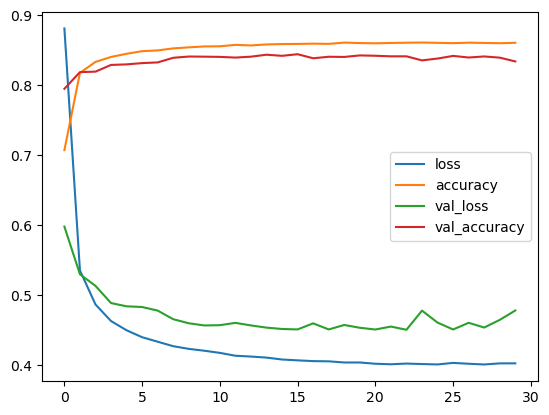

In [18]:
# plot loss curve
pd.DataFrame(history_1.history).plot()

In [19]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
